# Introduction :
DATASET: NSL-KDD

With the dramatic growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly while the all the systems suffers from security vulnerabilities, which could increase the attacks that could negatively affects the economy. Therefore detecting vulnerabilities in the system in the network has been more important and need to be done as accurate as possible in real time. In this task a moel will be created and trained using SVM classifier to distengush if there is an attack or not in the network packet.

### Importing the Dataset and the Libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)


Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [3]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# EDA

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

##### Check if there is Null values

In [5]:
df_test.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [6]:
df.nunique()
df_test.nunique()


,0
duration,624
protocol_type,3
service,64
flag,11
src_bytes,1149
dst_bytes,3650
land,2
wrong_fragment,3
urgent,4
hot,16


##### Check if there are duplicated rows

In [7]:
df.duplicated().sum()
df_test.duplicated().sum()

0

In [8]:
types = df["label"].unique()
types

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

### Make labels columns as normal or attack : binary classification

In [9]:
types = types[1:]
types


array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'],
      dtype=object)

In [10]:
df["label"].replace(to_replace=types,value="attack", inplace = True)

<ipython-input-10-d23b4ce7ad2f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label"].replace(to_replace=types,value="attack", inplace = True)


In [11]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [12]:
type = df_test["label"].unique()
type

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [13]:
import numpy as np

# Given array of labels
attacks = np.array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
                   'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
                   'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
                   'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
                   'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
                   'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
                   'ftp_write', 'imap', 'udpstorm', 'phf'])

# Filter out the 'normal' label
non_normal_labels = attacks[attacks != 'normal']



In [14]:
df_test["label"].replace(to_replace=non_normal_labels,value="attack", inplace = True)

<ipython-input-14-b945cb451dab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["label"].replace(to_replace=non_normal_labels,value="attack", inplace = True)


In [15]:
df_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,attack
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,attack
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,attack
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,attack


In [16]:
#Checkinf if There is mismatch in some of the categorical features

feature_type_map = {f: (df.dtypes.loc[f], df_test.dtypes.loc[f]) for f in df.columns}
df.dtypes == df_test.dtypes
#there is no mismatch

,0
duration,True
protocol_type,True
service,True
flag,True
src_bytes,True
dst_bytes,True
land,True
wrong_fragment,True
urgent,True
hot,True


## Visualize Categorical Columns


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline

fig = px.pie(df, values=df['label'].value_counts(), names=df['label'].unique(), title='Labels',width = 500, height = 500)
fig.show()

fig = px.pie(df_test, values=df_test['label'].value_counts(), names=df_test['label'].unique(), title='Labels',width = 500, height = 500)
fig.show()

<Axes: xlabel='count', ylabel='protocol_type'>

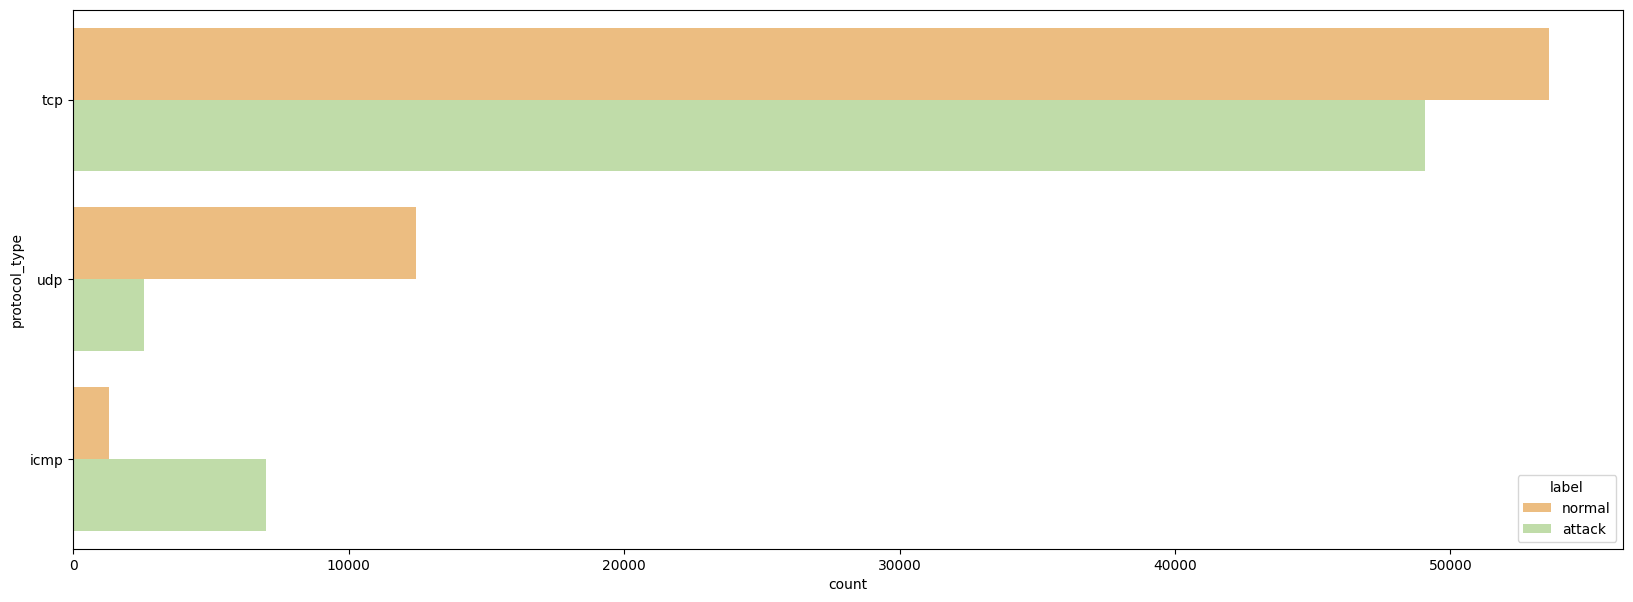

In [18]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, y=df.protocol_type , hue = 'label', palette="Spectral")

<Axes: xlabel='count', ylabel='protocol_type'>

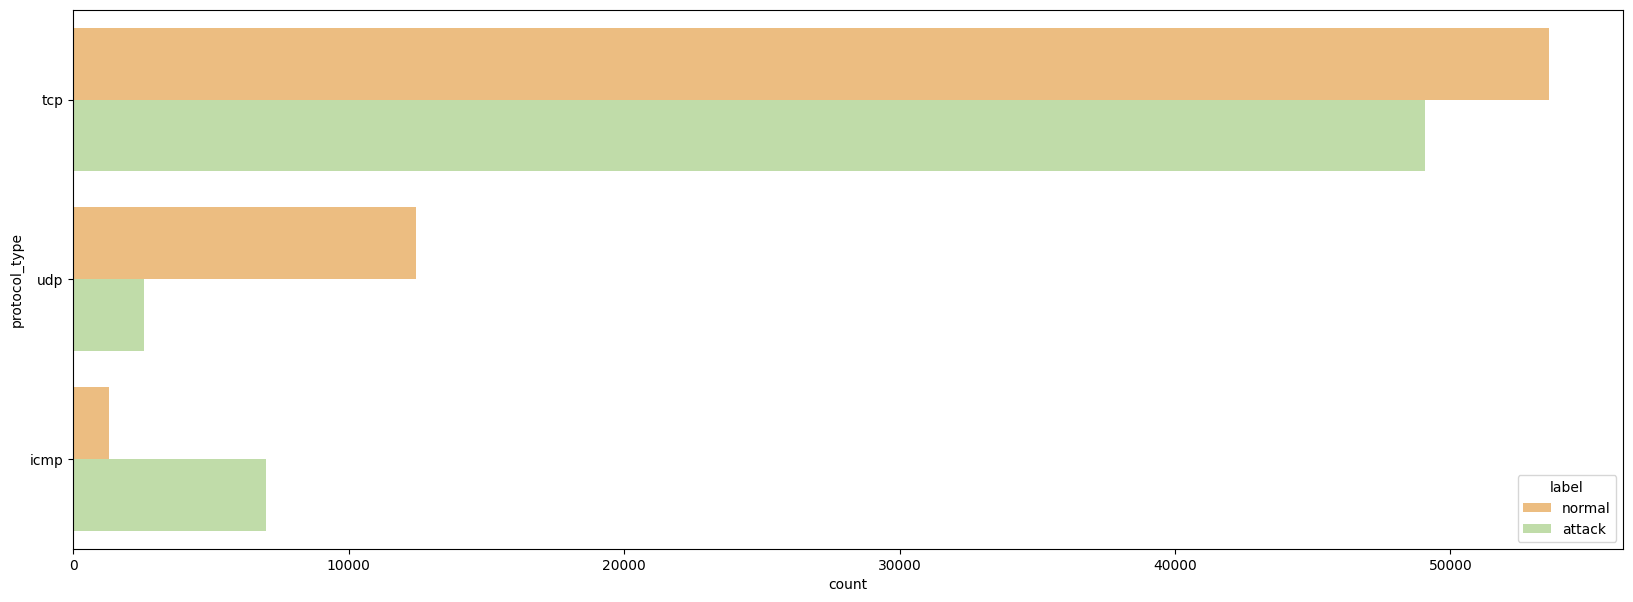

In [19]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, y=df.protocol_type, hue="label" , palette="Spectral")

<Axes: xlabel='count', ylabel='service'>

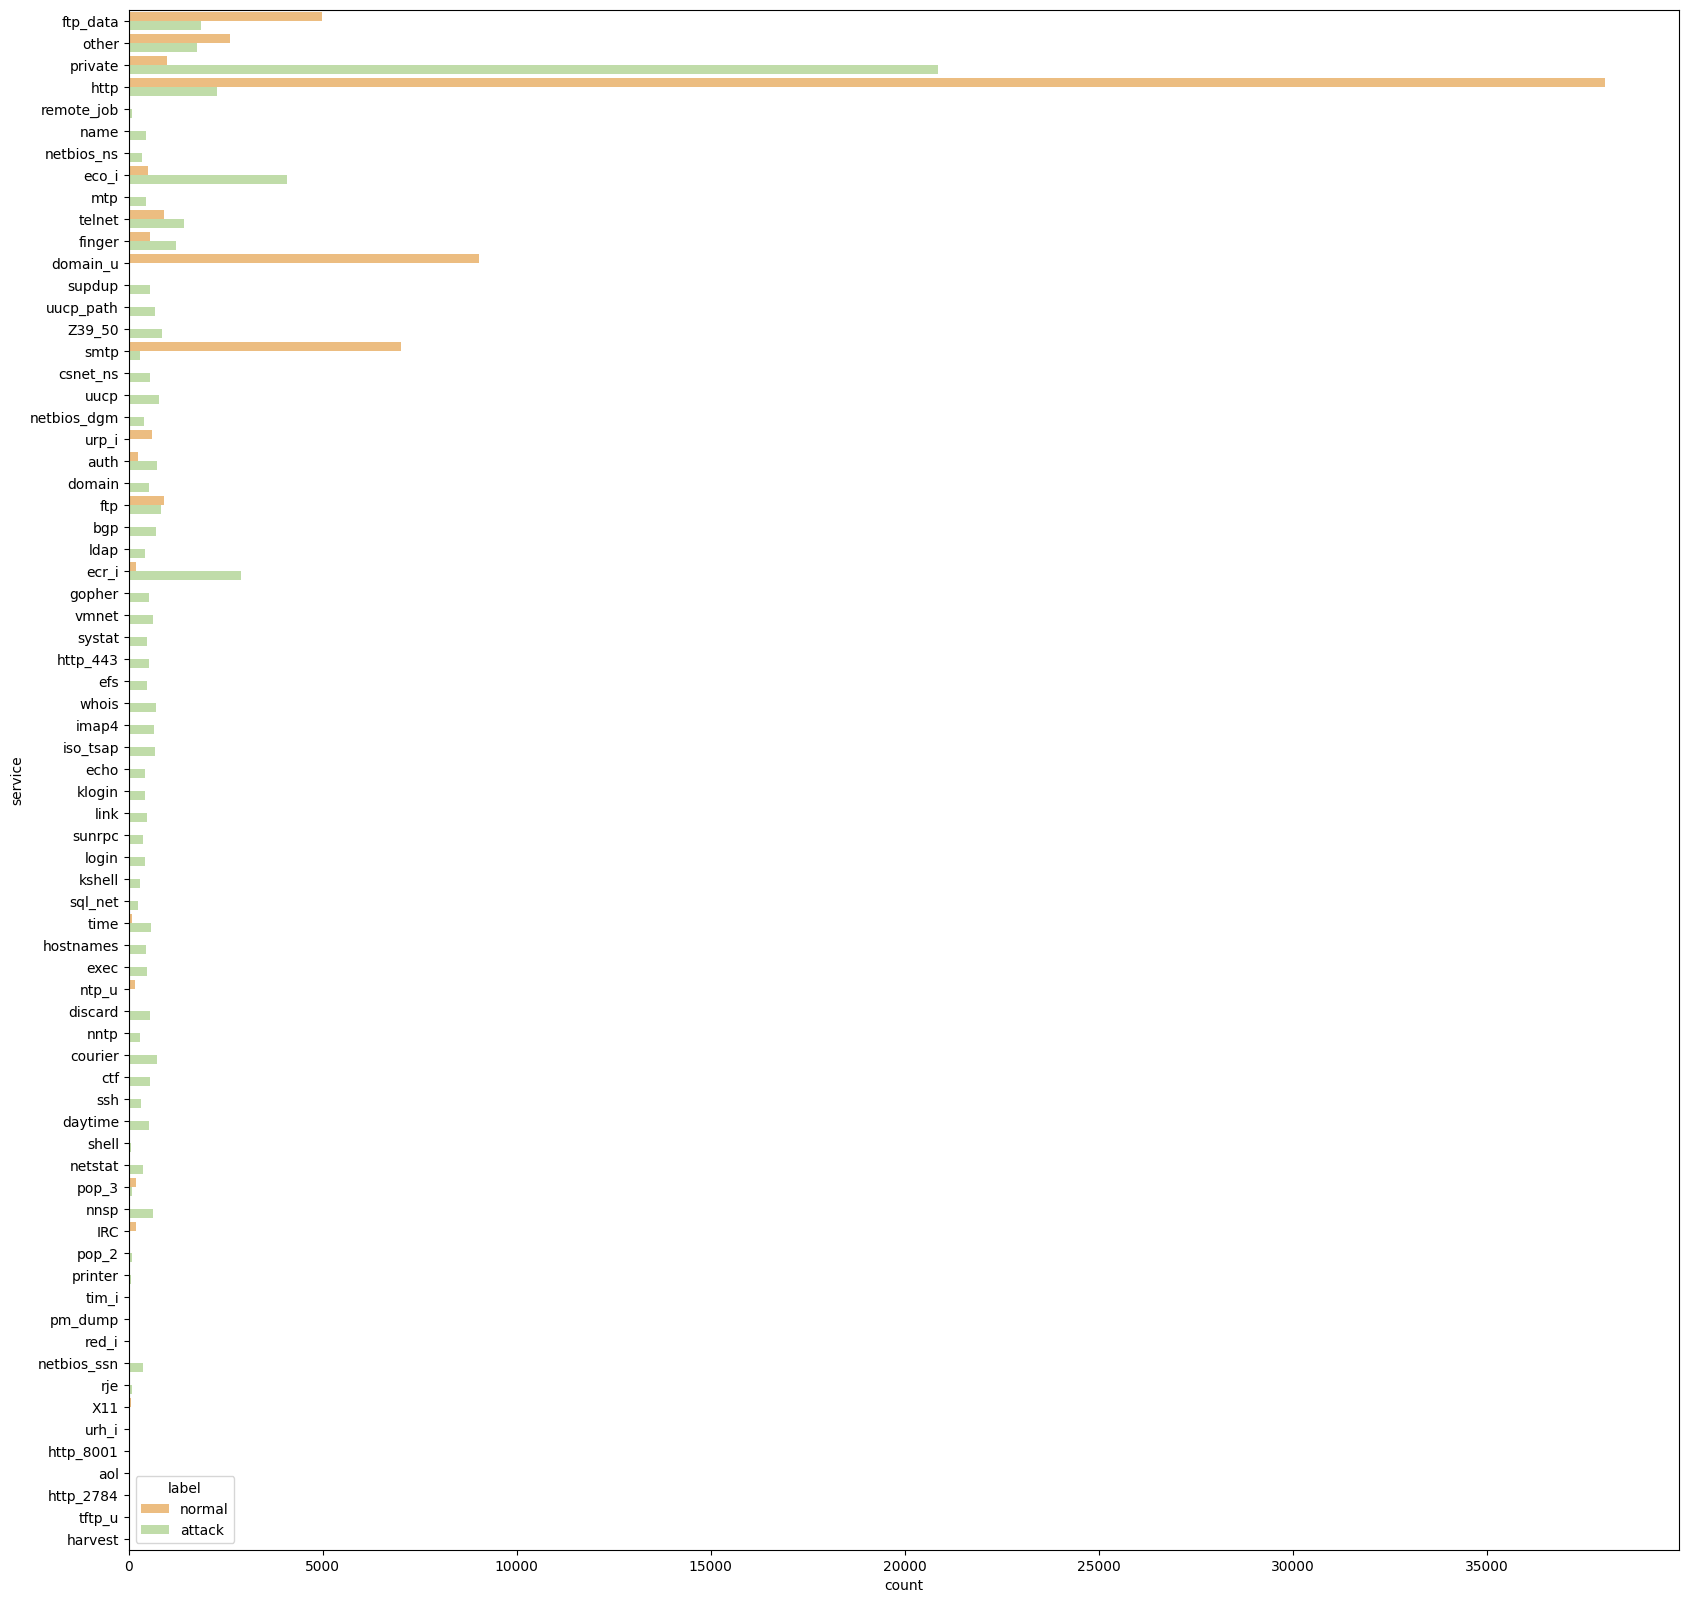

In [20]:
plt.figure(figsize = (20,20))
sns.countplot(data=df, y=df.service, hue = 'label', palette="Spectral")

<Axes: xlabel='count', ylabel='service'>

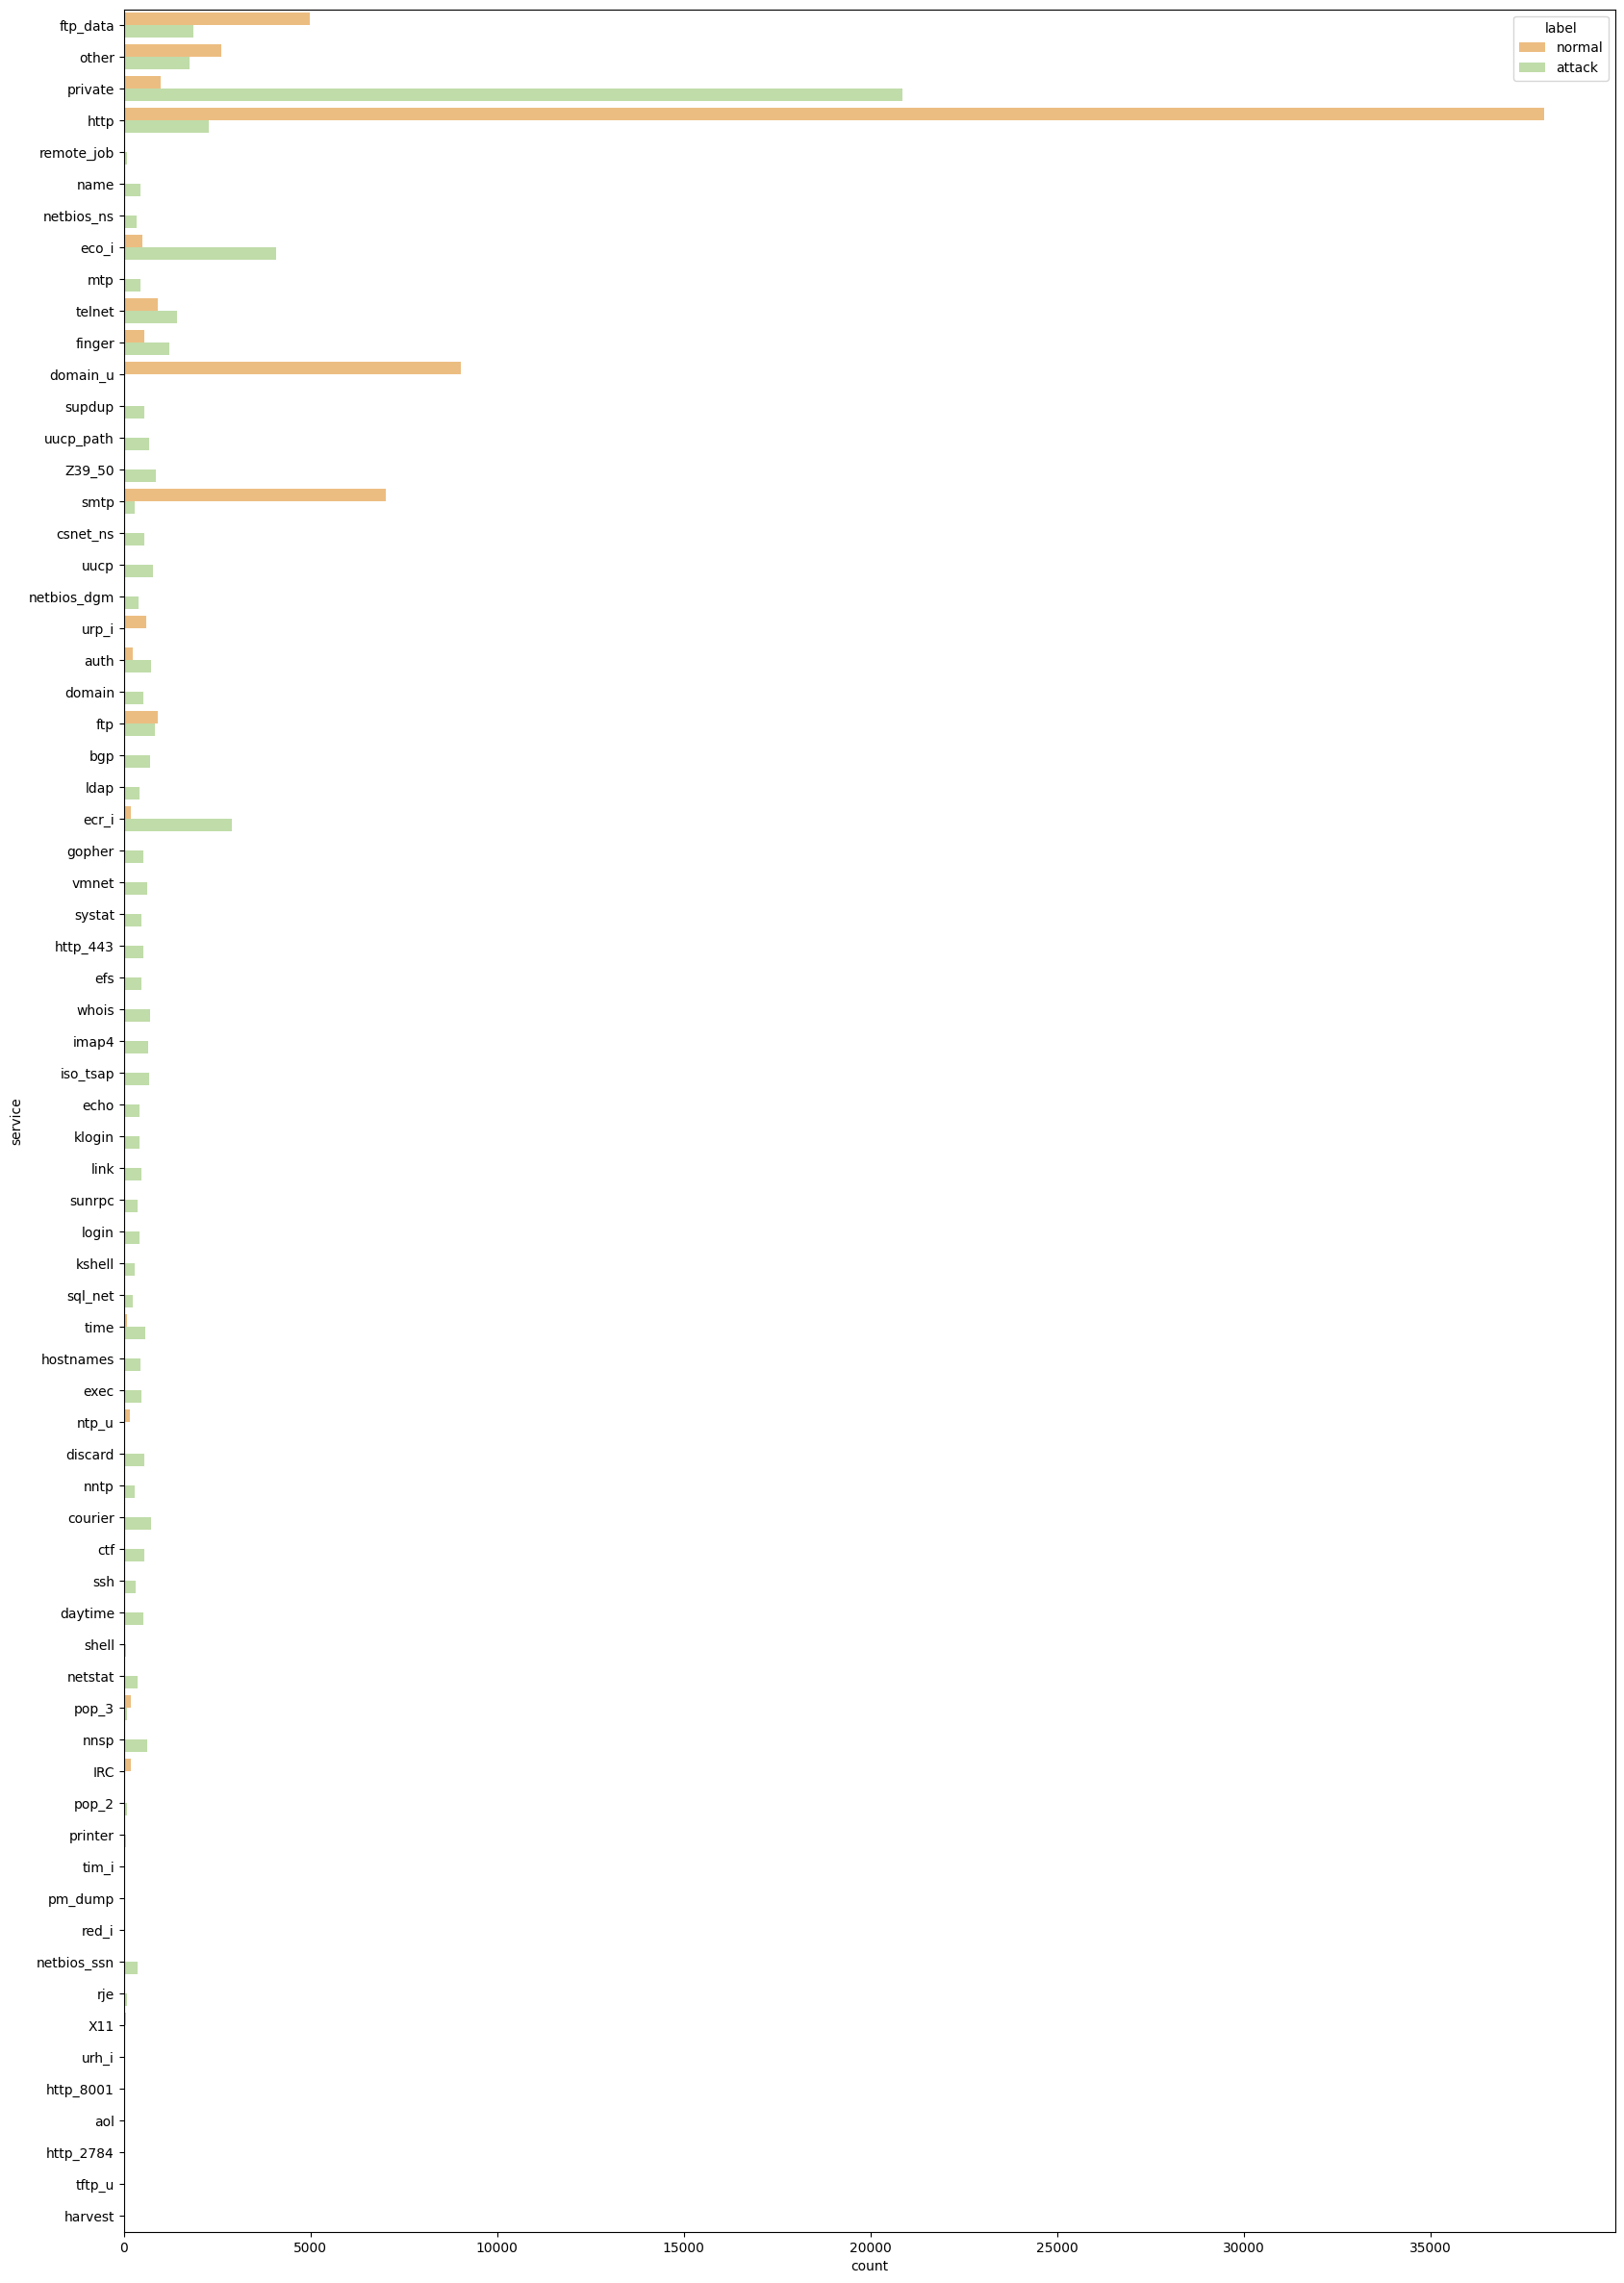

In [21]:
plt.figure(figsize = (20,30))
sns.countplot(data=df, y=df.service, hue="label" , palette="Spectral")

<Axes: xlabel='count', ylabel='flag'>

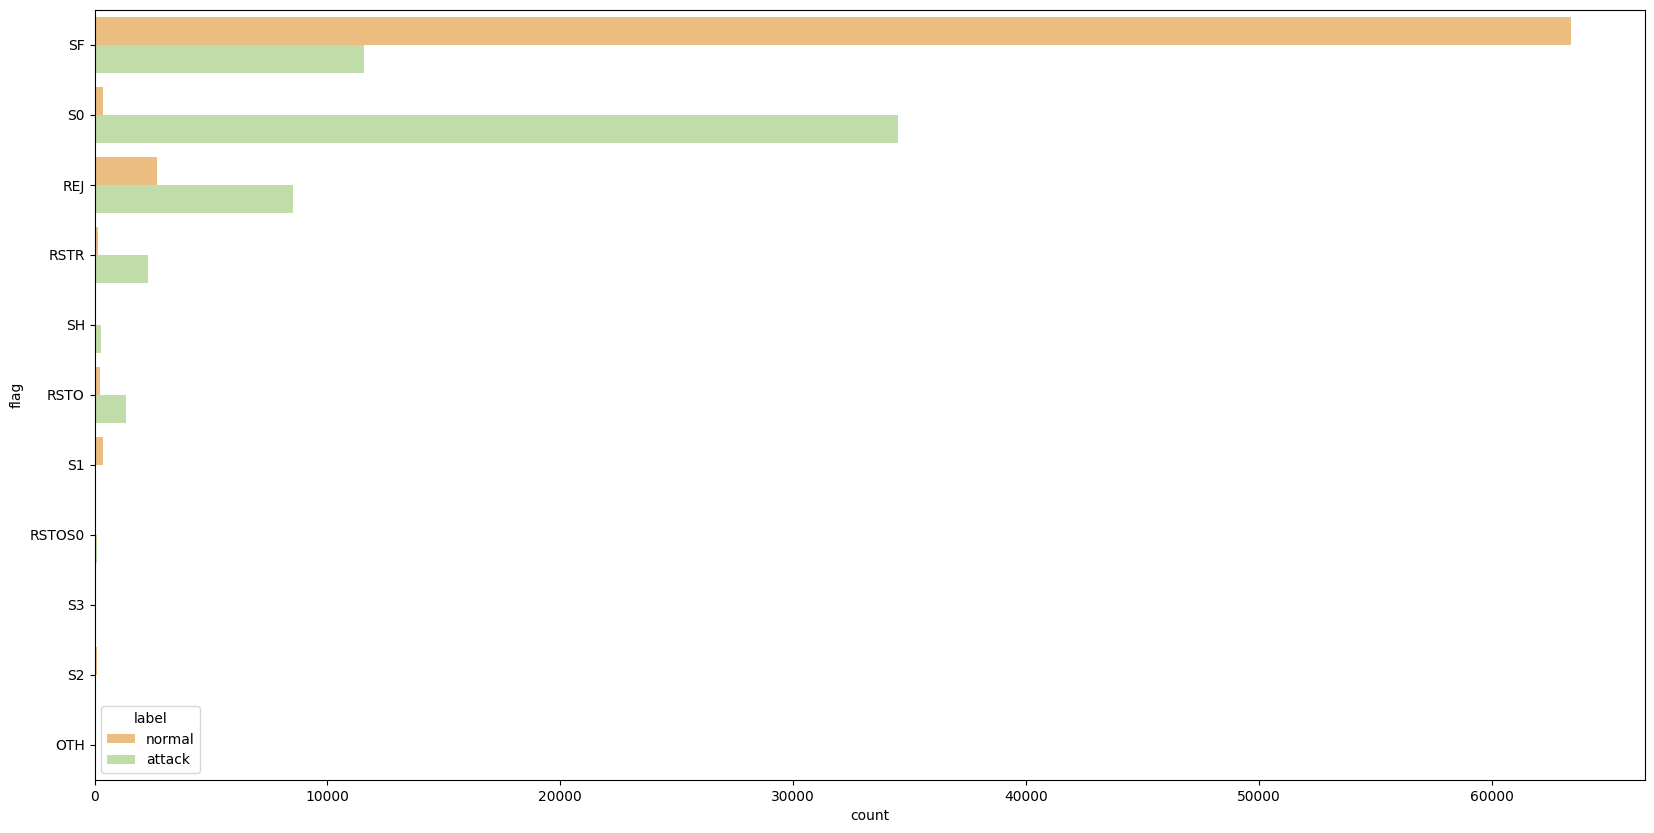

In [22]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, y=df.flag,hue = 'label', palette="Spectral")

## Visualize Numerical Columns

In [23]:
visualize_numbers = len(df.select_dtypes(include=["number"]).columns)
visualize_numbers

38

In [24]:
def create_plot_pivot(df, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = df.groupby([x_column, 'label']).size() \
    .reset_index().pivot(columns='label', index=x_column, values=0)
    return _df_plot

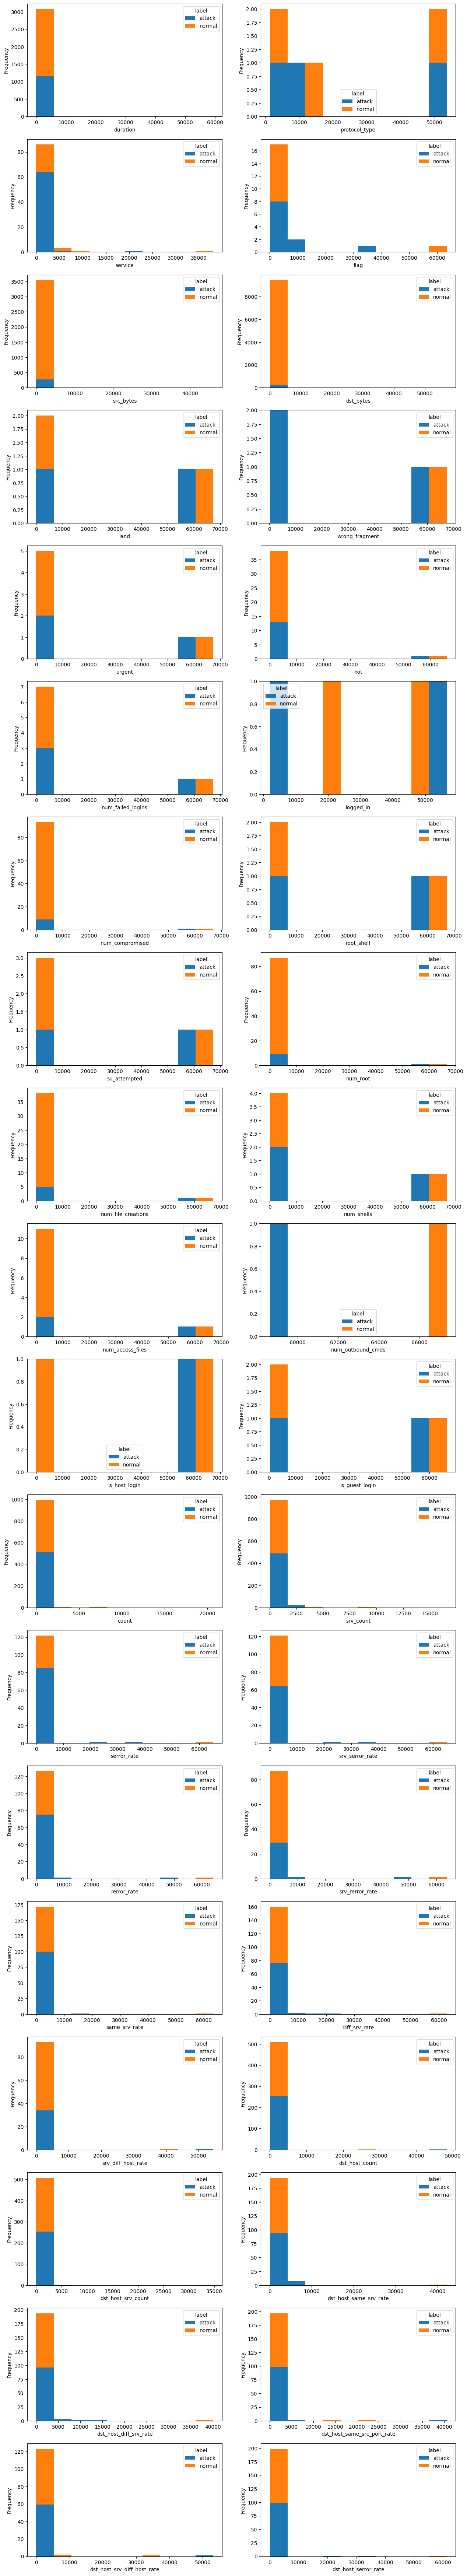

In [25]:
cols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]

fig, ax = plt.subplots(19, 2, figsize=(15,90))
axe = ax.ravel()

for i in range(visualize_numbers):
    create_plot_pivot(df, cols[i]).plot(kind='hist',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

# Preprocessing

### Encode Categorical Columns : ( LabelEncoder because OHE can generate too many columns )

In [26]:
for col in df.select_dtypes(include=["object"]):
    print(col)

protocol_type
service
flag
label


In [27]:
for col in df_test.select_dtypes(include=["object"]):
    print(col)

protocol_type
service
flag
label


In [28]:
from sklearn.preprocessing import LabelEncoder

objects = ['protocol_type','service','flag','label']

for object in objects:
    en = LabelEncoder()

    df[object] = en.fit_transform(df[object])
    df_test[object] = en.fit_transform(df_test[object])

In [29]:
df.head()
#df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


## Correlation


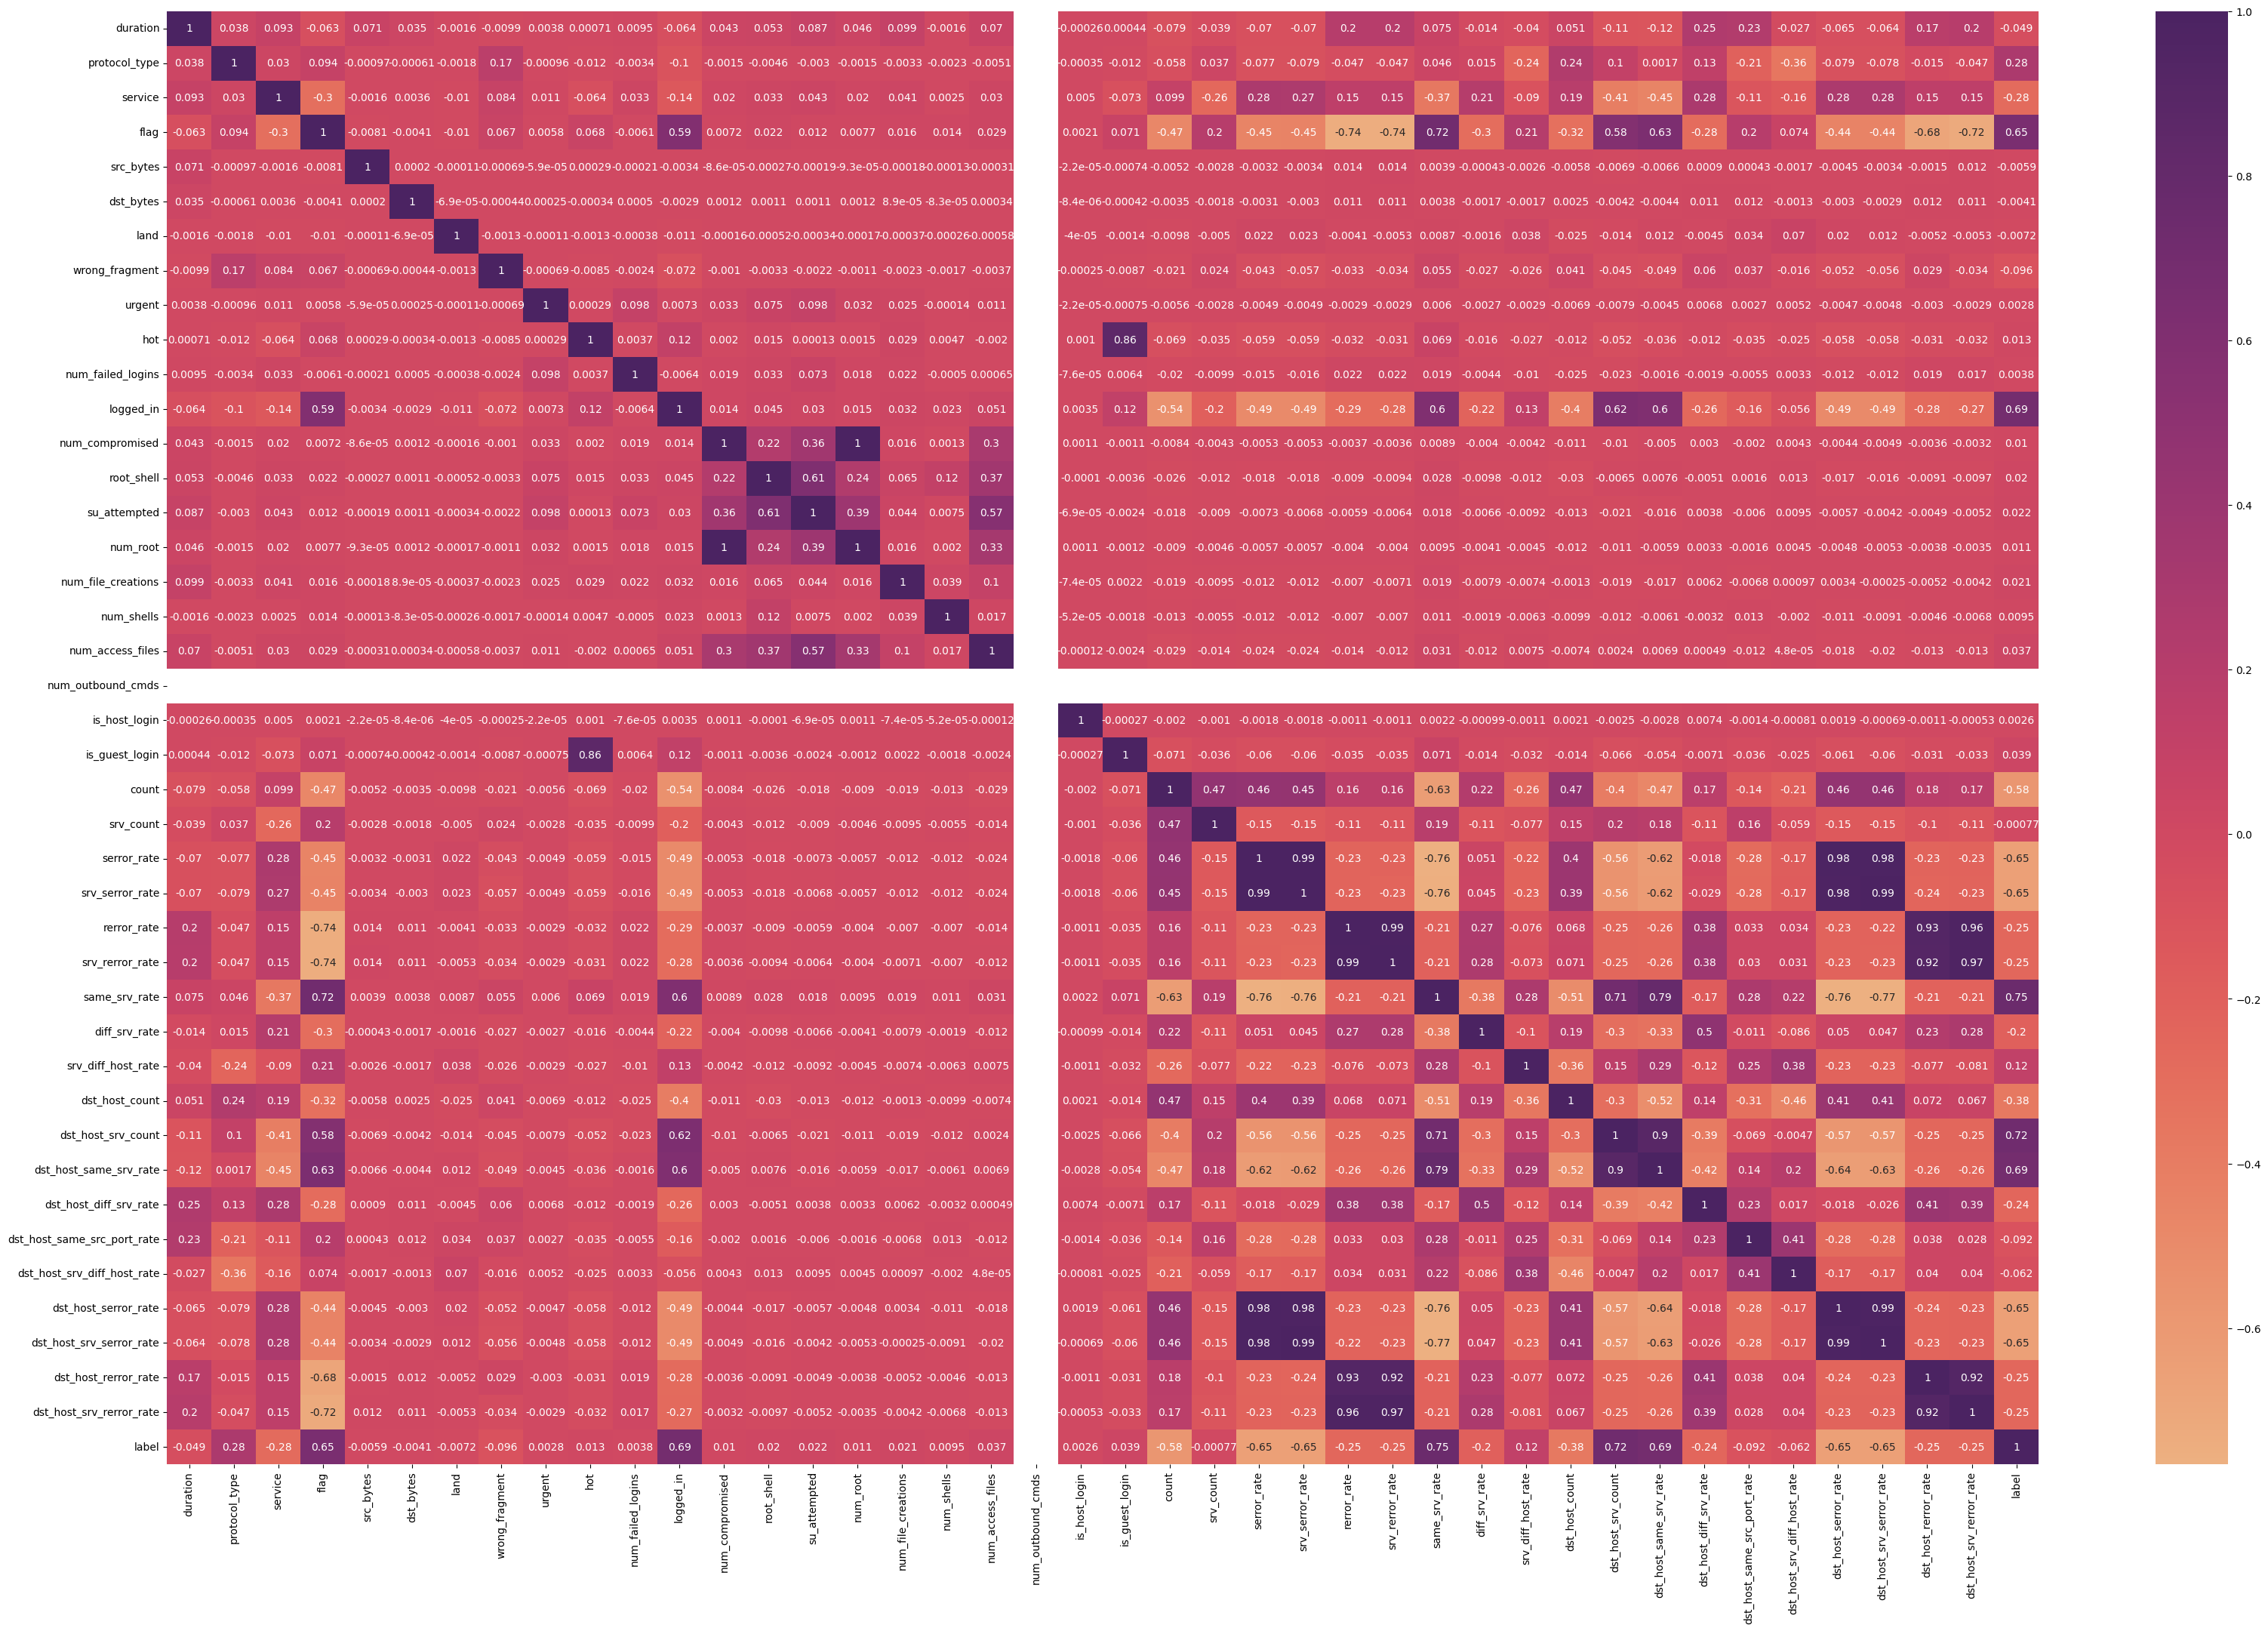

In [30]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot= True,cmap = 'flare')
plt.show()

In [31]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
duration,1.000000,0.038241,0.092858,0.063390,0.070737,0.034878,0.001553,0.009866,0.003830,0.000705,...,0.109776,0.116005,0.254195,0.228737,0.026669,0.064948,0.064361,0.173815,0.199024,0.048785
protocol_type,0.038241,1.000000,0.029994,0.093668,0.000974,0.000608,0.001757,0.169535,0.000965,0.011857,...,0.103919,0.001702,0.131380,0.209105,0.356183,0.079398,0.077925,0.015434,0.046938,0.281355
service,0.092858,0.029994,1.000000,0.304014,0.001631,0.003596,0.009952,0.084404,0.010980,0.064066,...,0.407696,0.452696,0.284072,0.111163,0.156211,0.281635,0.277594,0.150666,0.148405,0.276548
flag,0.063390,0.093668,0.304014,1.000000,0.008114,0.004096,0.010373,0.067214,0.005811,0.068437,...,0.582687,0.630118,0.283607,0.195689,0.073773,0.443441,0.443225,0.683310,0.718778,0.647073
src_bytes,0.070737,0.000974,0.001631,0.008114,1.000000,0.000204,0.000109,0.000693,0.000059,0.000295,...,0.006861,0.006572,0.000900,0.000431,0.001655,0.004503,0.003397,0.001468,0.012449,0.005921
dst_bytes,0.034878,0.000608,0.003596,0.004096,0.000204,1.000000,0.000069,0.000440,0.000248,0.000344,...,0.004224,0.004424,0.011031,0.011747,0.001281,0.003024,0.002944,0.011729,0.011223,0.004118
land,0.001553,0.001757,0.009952,0.010373,0.000109,0.000069,1.000000,0.001261,0.000109,0.001340,...,0.014159,0.011597,0.004516,0.033851,0.070474,0.019840,0.012276,0.005222,0.005303,0.007191
wrong_fragment,0.009866,0.169535,0.084404,0.067214,0.000693,0.000440,0.001261,1.000000,0.000692,0.008508,...,0.045240,0.048733,0.059797,0.037177,0.016252,0.051917,0.055917,0.028890,0.033682,0.095905
urgent,0.003830,0.000965,0.010980,0.005811,0.000059,0.000248,0.000109,0.000692,1.000000,0.000293,...,0.007897,0.004489,0.006840,0.002741,0.005176,0.004749,0.004834,0.002999,0.002912,0.002787
hot,0.000705,0.011857,0.064066,0.068437,0.000295,0.000344,0.001340,0.008508,0.000293,1.000000,...,0.051864,0.036293,0.012293,0.034536,0.024715,0.058222,0.058214,0.030555,0.031670,0.013083


In [32]:
# Select upper triangle of correlation matrix since it is symmetric
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


# Hybrid Feature Selection (HFS)

## Stage 1: Correlation-based Feature Selection (CFS)

In [33]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [34]:
# Drop features in training
df.drop(to_drop, axis=1, inplace=True)
# Drop features in testing
df_test.drop(to_drop, axis=1, inplace=True)

In [35]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,label
0,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,255,10,0.04,0.06,0.00,0.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,255,1,0.00,0.06,0.00,0.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0
4,1,1,55,2,0,15,0,0,0,0,...,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.83,0


In [36]:
# Split the dataset into features (X) and target (y)
X_train = df.drop(columns=['label'])
y_train = df['label']

X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

# Check the shape
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (125973, 35), y_train shape: (125973,)
X_test shape: (22544, 35), y_test shape: (22544,)


## Stage 2: Random Forest Recursive Feature Elimination (RF-RFE)

In [37]:

## RF-RFE typically doesn't require feature scaling because the Random Forest model is not sensitive to feature scales.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rfe = RFE(estimator=rf_model, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get selected features
selected_features_rf_rfe = X_train.columns[rfe.support_]


X_train_final = X_train[selected_features_rf_rfe]
X_test_final = X_test[selected_features_rf_rfe]

print(f"Selected features after RF-RFE: {X_train_final.shape[1]}")

Selected features after RF-RFE: 10


In [38]:
X_train_final.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate'],
      dtype='object')

# Data Scaling using Standard Scalar :

we didn't use Normalization because we aren't using models based on distance

In [39]:
#Data Scaling using Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.fit_transform(X_test_final)


### Build the model

# 1. SVM 'Support Vector Machine' :

1.1 SVM with Linear kernel :

In [40]:
##SVM 'Support Vector Machine'
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

linear_svm = svm.SVC(kernel='linear')

linear_svm.fit(X_scaled, y_train)

y_pred_linear = linear_svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_linear)
print(f"SVM Accuracy: {accuracy_svm}")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))


SVM Accuracy: 0.7448988644428672
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73     12833
           1       0.64      0.93      0.76      9711

    accuracy                           0.74     22544
   macro avg       0.78      0.77      0.74     22544
weighted avg       0.80      0.74      0.74     22544



# 1. SVM 'Support Vector Machine' :

1.2 SVM with Polynomial kernel :

In [41]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

poly_svm = svm.SVC(kernel='poly', degree=3)

poly_svm.fit(X_scaled, y_train)

y_pred_poly = poly_svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_poly)
print(f"SVM Accuracy: {accuracy_svm}")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_poly))

SVM Accuracy: 0.7571859474804826
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.74     12833
           1       0.65      0.96      0.77      9711

    accuracy                           0.76     22544
   macro avg       0.80      0.78      0.76     22544
weighted avg       0.82      0.76      0.75     22544



# 1. SVM 'Support Vector Machine' :

1.3 SVM with RBF kernel :

In [42]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

linear_rbf = svm.SVC(kernel='rbf')

linear_rbf.fit(X_scaled, y_train)

y_pred_rbf = linear_rbf.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_rbf)
print(f"SVM Accuracy: {accuracy_svm}")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))

SVM Accuracy: 0.7672995031937544
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     12833
           1       0.66      0.96      0.78      9711

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.83      0.77      0.76     22544



# 1. SVM 'Support Vector Machine' :

1.4 SVM with Sigmoid kernel :

In [43]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

linear_sig = svm.SVC(kernel='sigmoid',)

linear_sig.fit(X_scaled, y_train)

y_pred_sig = linear_sig.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_sig)
print(f"SVM Accuracy: {accuracy_svm}")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_sig))

SVM Accuracy: 0.7280872959545777
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.72     12833
           1       0.63      0.88      0.74      9711

    accuracy                           0.73     22544
   macro avg       0.75      0.75      0.73     22544
weighted avg       0.77      0.73      0.73     22544



# 2. Logistic Regression

In [44]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_scaled, y_train)


y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.7650372604684174
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.77     12833
           1       0.67      0.88      0.76      9711

    accuracy                           0.77     22544
   macro avg       0.78      0.78      0.77     22544
weighted avg       0.79      0.77      0.77     22544



 # 3. K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.7548793470546487
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     12833
           1       0.65      0.95      0.77      9711

    accuracy                           0.75     22544
   macro avg       0.80      0.78      0.75     22544
weighted avg       0.82      0.75      0.75     22544



 # 4. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8327714691270405
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     12833
           1       0.83      0.77      0.80      9711

    accuracy                           0.83     22544
   macro avg       0.83      0.83      0.83     22544
weighted avg       0.83      0.83      0.83     22544



# 5. Decision tree with Best parameters

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_scaled, y_train)

# Best parameters and model
print(f"Best Hyperparameters: {grid_search.best_params_}")
dt_model = grid_search.best_estimator_

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.705376153300213
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77     12833
           1       0.75      0.47      0.58      9711

    accuracy                           0.71     22544
   macro avg       0.72      0.68      0.68     22544
weighted avg       0.72      0.71      0.69     22544



# 6. Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8096611071682044
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83     12833
           1       0.75      0.83      0.79      9711

    accuracy                           0.81     22544
   macro avg       0.81      0.81      0.81     22544
weighted avg       0.81      0.81      0.81     22544



# 7. XGBoost

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.6130234208658624
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.99      0.74     12833
           1       0.86      0.12      0.21      9711

    accuracy                           0.61     22544
   macro avg       0.73      0.55      0.48     22544
weighted avg       0.71      0.61      0.51     22544



#  8. LightGBM with SMOTE (Synthetic Minority Over-sampling Technique)

In [50]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data (X_scaled, y_train)
X_res, y_res = smote.fit_resample(X_scaled, y_train)

# Initialize LightGBM model with balanced class weights
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)


lgb_model.fit(X_res, y_res)


y_pred_lgb = lgb_model.predict(X_test_scaled)


accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy after SMOTE: {accuracy_lgb}")

# classification report
print("LightGBM Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_lgb))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Number of positive: 67343, number of negative: 67343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1755
[LightGBM] [Info] Number of data points in the train set: 134686, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy after SMOTE: 0.8179559971611071
LightGBM Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12833
           1       0.79      0.79      0.79      9711

    accuracy                           0.82     22544
   macro avg       0.81      0.81      0.81     22544
weighted avg       0.82      0.82      0.82     22544



| **Model**              | **Accuracy** | **Precision (0)** | **Recall (0)** | **F1-Score (0)** | **Precision (1)** | **Recall (1)** | **F1-Score (1)** | **General Recall** | **General F1-Score** |
|------------------------|--------------|-------------------|----------------|------------------|-------------------|----------------|------------------|--------------------|---------------------|
| SVM (linear)           | 0.7695       | 0.95              | 0.63           | 0.76             | 0.66              | 0.95           | 0.78             | 0.79               | 0.77                |
| SVM (poly)             | 0.7943       | 0.96              | 0.66           | 0.79             | 0.68              | 0.97           | 0.80             | 0.82               | 0.79                |
| SVM (rbf)              | 0.7909       | 0.97              | 0.65           | 0.78             | 0.68              | 0.97           | 0.80             | 0.81               | 0.79                |
| SVM (sigmoid)          | 0.7202       | 0.86              | 0.60           | 0.71             | 0.63              | 0.88           | 0.73             | 0.74               | 0.72                |
| Logistic Regression    | 0.7623       | 0.91              | 0.65           | 0.76             | 0.66              | 0.92           | 0.77             | 0.78               | 0.76                |
| K-Nearest Neighbors    | 0.7822       | 0.97              | 0.64           | 0.77             | 0.67              | 0.98           | 0.79             | 0.81               | 0.78                |
| Random Forest          | 0.7807       | 0.88              | 0.71           | 0.79             | 0.70              | 0.87           | 0.77             | 0.79               | 0.78                |
| **Decision Tree**          | **0.8687**      | 0.87              | 0.90           | 0.89             | 0.86              | 0.83           | 0.84             | 0.86               | 0.87                |
| Gradient Boosting      | 0.7976       | 0.83              | 0.81           | 0.82             | 0.76              | 0.78           | 0.77             | 0.80               | 0.79                |
| XGBoost                | 0.7972       | 0.84              | 0.80           | 0.82             | 0.75              | 0.79           | 0.77             | 0.80               | 0.79                |
| **LightGBM after SMOTE**| **0.8180**   | **0.84**          | **0.84**       | **0.84**         | **0.79**          | **0.79**       | **0.79**         | **0.81**           | **0.81**             |
